In [6]:
# download coco 2017 unlabelled images
import wget
wget.download('http://images.cocodataset.org/zips/unlabeled2017.zip')

'unlabeled2017.zip'

In [8]:
import splitfolders
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from dataset_sequence import DatasetSequence

In [6]:
# We will use the split_folders package to split the dataset into training, validation and testing directories
dataset_path = './unlabeled2017'
splitfolders.ratio(dataset_path, output='./dataset_split', ratio=(.8, .1, .1), move=True)

In [9]:
# Try to load the dataset
dataset_path = './dataset_split'
train_ds = DatasetSequence(dataset_path, batch_size=32, split='train', image_size=(256, 256))
test_ds = DatasetSequence(dataset_path, batch_size=32, split='test', image_size=(256, 256))
val_ds = DatasetSequence(dataset_path, batch_size=32, split='val', image_size=(256, 256))

In [4]:
# Print the number of batches in each dataset split
print('Number of batches in training dataset:', len(train_ds))
print('Number of batches in testing dataset:', len(test_ds))
print('Number of batches in validation dataset:', len(val_ds))

Number of batches in training dataset: 3085
Number of batches in testing dataset: 385
Number of batches in validation dataset: 385


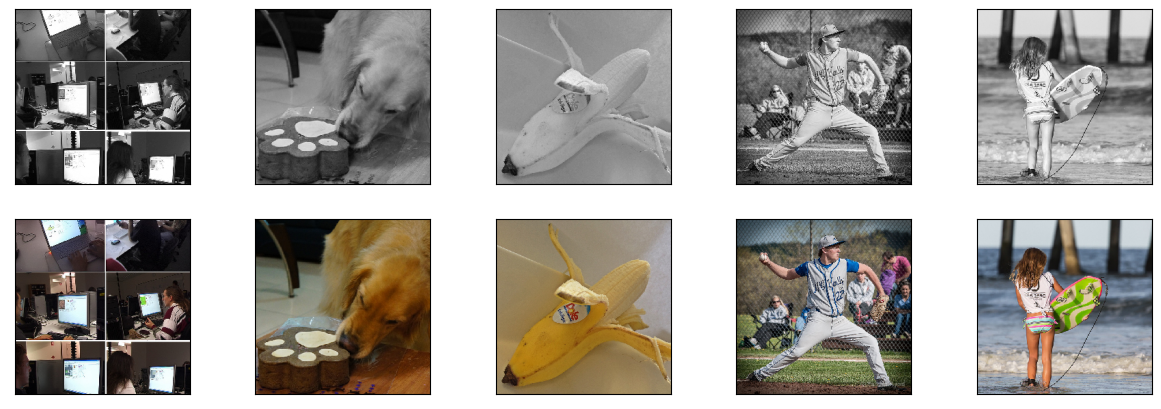

In [7]:
# Plot some images from the test dataset

batch = next(iter(train_ds))
# batch[0][i] is a (256, 256, 1) V channel image
# batch[1][i] is a (256, 256, 3) HSV image

# Plot a (2, 5) grid of images with the V channel on the top row and the HSV image on the bottom row
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
for i in range(5):
    axes[0, i].imshow(batch[0][i], cmap='gray')
    axes[1, i].imshow(tf.image.hsv_to_rgb(batch[1][i])) # convert HSV to RGB for plotting
# Remove the x and y ticks from the plots
for ax in axes.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()
